<a href="https://colab.research.google.com/github/aselshall/subselection/blob/main/Subset_selection/SubsetSelection_interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prescreening and Subset selection

In [ ]:
#Import module and call  functions
from fun import *

from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import numpy as np
import numpy.ma as ma
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import itertools

pd.set_option('max_columns', None)
import warnings
warnings.filterwarnings('ignore')

### a. Prescreening
![](https://drive.google.com/uc?export=view&id=1PHTOm0uXF148BdFou1h5RaMTwNY5YkDQ)

#### a1. Select input data (Section 2.2)
Load Karenia brevis data. The Karenia brevis cell count used in this study are from the harmful algal bloom database of the Fish and Wildlife Research Institute at the Florida Fish and the Wildlife Conservation Commission (FWRI, 2020). In the study area (Fig. 1) and given the study period from 1993-01 to 2014-12, we identify 15 time intervals of large blooms, and 29 time intervals with no bloom; each time interval is six-month long. Following [Maze et al. (2015](https://doi.org/10.1016/j.hal.2015.10.003), a large bloom is defined as an event with the cell count exceeding 1×105 cells/L for ten or more successive days without a gap of more than five consecutive days, or 20% of the bloom length. Similar to Maze et al. (2015) we define no bloom as the absence of large bloom. For details about Karenia brevis data analysis check ‘Karenia_brevis_data_analysis’ folder.

We use global reanalysis data, which combine observations with shortrange weather forecast using weather forecasting models to fill the gaps in the observational records. We use the Copernicus Marine Environment Monitoring Service (CMEMS) monthly gridded observation reanalysis product that has the product identifier Global_Reanalysis_PHY_001_030 ([Drévillon et al., 2018](https://cmems-resources.cls.fr/documents/PUM/CMEMS-GLO-PUM-001-030.pdf); [Fernandez and Lellouche, 2018](https://repository.oceanbestpractices.org/handle/11329/955)). The used CMEMS reanalysis product is a global ocean eddy-resolving reanalysis with approximatively 8 km horizontal resolution covering the altimetry from 1993 onward. Similar to CMIP6 data, we only focus on sea surface height above geoid, which is has the variable name zos according to the Climate and Forecast Metadata Conventions (CF Conventions).


We use 41 CMIP6 model runs from 14 different models developed by eight institutes. The study period is from 1993-01 to 2014-12. We select CMIP6 model runs from the historical experiment and the hist-1950 experiment, which are sibling experiments that use historical forcing of recent past until 2015. For high-resolution models, our selection criteria are to select all model runs with gridded monthly “sea surface height above geoid” , which is has the variable name zos according to the Climate and Forecast Metadata Conventions (CF Conventions),  with nominal resolution less than or equal to 25 km. For each model we only consider the variable zos. Given the available CMIP6 data until September 2020 when this study started, this resulted in 33 model runs. We mainly focus on high-resolution models with eddy-rich ocean resolution, which is important for simulating Loop Current. For our analysis purpose, we include two models with standard resolution. One is EC-Earth3P with nominal ocean resolution of about 100km given in the hist-1950 experiment with three model runs, and E3SM-1-0 with variable ocean resolution of 30-60 km given in the historical experiment with five model runs.

In [ ]:
zosMRaw,zosO,KB,df,ns,ne,ss,se,nm,m=LoadData(loadmat,pd,np,Display_Results=0)

Karenia brevis data size (44,)
zos reanalysis data size along the two segments on the Bathymetry 300 (264, 119)
zos ESMs data size along the two segments on the Bathymetry 300 (41, 264, 119)
Number of members: 41


List of all used model runs. For each model `Source ID` multiple perturbed runs of (parameter) realizations `r`, initializations `i`, physics `p`, and forcings `f` are considered. For example, `CESM1-CAM5-SE-HR` has only one model run `r1i1p1f1`, and `E3SM-1-0` has five model runs with perturbed realizations `r(1-5)ip1f1`. The column `Resolution` refers to the ocean grid resolution, and `nominal resolution` refers to the coupled model resolution.

In [ ]:
display(df)

,MIP_ERA,Activity,Institution_ID,Source_ID,Experiment_ID,Variant_Label,n_realizations,zos_size,Resolution,nominal_resolution
0,CMIP6,HighResMIP,NCAR,CESM1-CAM5-SE-HR,hist-1950,r1i1p1f1,1,"[3600,2400,780]",HR,25 km
1,CMIP6,HighResMIP,CMCC,CMCC-CM2-HR4,hist-1950,r1i1p1f1,1,"[1442,1051,12]",HR,25 km
2,CMIP6,HighResMIP,CMCC,CMCC-CM2-VHR4,hist-1950,r1i1p1f1,1,"[1442,1051,12]",HR,25 km
3,CMIP6,HighResMIP,CNRM-CERFACS,CNRM-CM6-1-HR,hist-1950,r1i1p1f2,3,"[1442,1050,120]",HR,25 km
4,CMIP6,HighResMIP,CNRM-CERFACS,CNRM-CM6-1-HR,hist-1950,r2i1p1f2,0,"[1442,1050,120]",HR,25 km
5,CMIP6,HighResMIP,CNRM-CERFACS,CNRM-CM6-1-HR,hist-1950,r3i1p1f2,0,"[1442,1050,120]",HR,25 km
6,CMIP6,CMIP,CNRM-CERFACS,CNRM-CM6-1-HR,historical,r1i1p1f2,1,"[1442,1050,1980]",HR,25 km
7,CMIP6,CMIP,E3SM-Project,E3SM-1-0,historical,r1i1p1f1,5,"[360,180,60]",LR,100 km
8,CMIP6,CMIP,E3SM-Project,E3SM-1-0,historical,r2i1p1f1,0,"[360,180,60]",LR,100 km
9,CMIP6,CMIP,E3SM-Project,E3SM-1-0,historical,r3i1p1f1,0,"[360,180,60]",LR,100 km


#### a2. Identify independent model subsets (Section 2.3)

To account for model independence, we use institutional democracy `M1`. For the same institution `Institution_ID` we created further subsets for different grids represting low resolution `LR`, medium resolution `MR`, and high resolution `HR`. This results in 11 ensmble members. Each ensmble member is an independent model subset (IMS). For example, IMS01 has only one model run `r1i1p1f1`, and IMS11 has seven model runs, three with perturbed initialization `r1i(1-3)p1f1`, and four with perturbed parameter realizations `r(1-4)i1p1f3` as shown in the `df` table. These model runs of each ensemble member (i.e., IMS) should not simply be included in a multi-model ensemble as they represent the same model, hence artificially increasing the weight of models with more model runs. On the other hand, using only one model run per ensemble member discards the additional information provided by these different runs. Accordingly, the zos data of each ensemble member is averaged given an model independence criteria. 

Model Independence can be evalauted given Institution_ID,	Source_ID, Experiment_ID,	Variant_Label, Resolution as shown in `df` table.  The default model independence criteria of institutional democracy and ocean grid `M1`. For example, `NM=np.array([1,2,4,5,3,3,6,3,3,4,7])` lists the members to averaged in the `df` table. In that case, IMS1 contains 
`NCAR	CESM1-CAM5-SE-HR`, IMS2 contains `CMCC	CMCC-CM2-HR4` and `CMCC-CM2-VHR4`, IMS3 contains the four members of `CNRM-CERFACS	CNRM-CM6-1-HR`, and so on. Some of the model independence criteria that can be investigated by the users include:
* institutional democracy and ocean grid as an additional criterion results in 11 ensemble members (default criteria) 
* institutional democracy, ocean grid as an second criterion, and experiment as a third criterion (13 ensemble members)
* models: all models are independent (14 ensemble members)
* All models are independent, and experiment as a second criterion (16 ensemble members)
* members: all members all independent (41 ensemble members)

The code additionally allows for any user defined criteria.
 



In [ ]:
#Model Independence 
#can be defined given Institution_ID,	Source_ID, Experiment_ID,	Variant_Label, Resolution	
#Below is five pre-defined cases MI=[1,...,5] and the user can create additional cases as needed
#MI=1 the defeault case is MI=1 that is presented in this manuscript.

MI=1  
if MI==1:
  #institutional democracy and ocean grid as an additional criterion (11 ensemble members)
  NM=np.array([1,2,4,5,3,3,6,3,3,4,7])
  print('ensemble size:', len(NM), 'ensemble members based on Institution_ID and Resolution criteria (default criteria)')

elif MI==2:
  #institutional democracy, ocean grid as an second criterion, and experiment as a third criterion (13 ensemble members)
  NM=np.array([1,2,3,1,5,3,3,6,3,3,4,3,4]) 
  print('ensemble size:', len(NM), 'ensemble members based on Institution_ID, Experiment_ID, and Resolution criteria')  

elif MI==3:
  #models: all models are independent (14 ensemble members)
  NM=np.array([1,1,1,4,5,3,3,6,3,1,2,1,3,7])
  print('ensemble size:', len(NM), 'ensemble members based on Source_ID criteria')

elif MI==4:
  #All models are independent, and experiment as a second criterion (16 ensemble members)
  NM=np.array([1,1,1,3,15,3,3,6,3,1,2,1,3,3,4])
  print('ensemble size:', len(NM), 'ensemble members based on Source_ID and Experiment_ID criteria')

elif MI==5:
  #members: all members all independent (41 ensemble members)
  NM =np.ones(zosMRaw.shape[0], dtype = int) 
  print('Ensemble size:', len(NM), 'ensemble members assuming all members are independent criteria')


ensemble size: 11 ensemble members based on Institution_ID and Resolution criteria (default criteria)


#### a3-a7: Prescreening processing (Section 2.4-2.6)
a3. process input data as described in Section 2.4 using Code2 `prescreeningTables`<br>
a4. define prescreening metrics as described in Section 2.5 using Code3 `predictos`<br>
a5. Score independent model subsets s described in Section 2.5 using Code4 `plot_zos`<br>
a6. Define prediction metrics as described in Section 2.5 using Code3 `predictos`<br>
a7. Evaluate predictions as described in Section 2.6 using Code2 `prescreeningTables`<br>

The result table `resm` shows all possible ensemble members. Each member is an IMS. Each member gets a `Score` give metrics `y<sub>1</sub>` to `y<sub>3</sub>` as described in Section 2.5 and Section 2.6. The predictive performance of each IMS is given such that
*  `e_size` refers to the number of model runs per IMS. <br>

The study considers 44 time intervals each is 6-month long. Given these 44 intervals, 
* `KB` is the count of large Karenia brevis blooms
* `LCN` is the count of Loop Current north
* `LCS` is the count of Loop Current south
* `LCN_NB` is the count of Loop Current north wih no bloom
* `LCN_B` is the count of Loop Current north with large bloom
* `LCS_NB` is the count of Loop Current south with no bloom
* `LCS_B`  is the count of Loop Current south with large bloom

Some metrics include
* `Err_KB` is the Karenia brevis error (y<sub>6</sub>):
* `Match_LCN` is the temporal match of Loop Current north between model and reanalysis * data 
* `Match_LCS` is the temporal match of Loop Current north between model and reanalysis data 
* `Match_LCN` is the temporal match of Loop Current south between model and reanalysis data 
* `Match_Tot` is the temporal match of Loop Current south between model and reanalysis data 
* `Err_LCN` is the temporal match error for Loop Current north (y<sub>5,LC-N</sub>)  
* `Err_LCS` is the temporal match error for Loop Current south (y<sub>5,LC-S</sub>)  
* `Err_Tot` is the temporal match error for Loop Current at both positions (y<sub>5</sub>)  
* `RMSE` is the root-mean-square error (y<sub>7</sub>)
* `Score` is the score of each IMS as described in Section 2.6

Section 2.5 provides detail about y<sub>5,LC-N</sub>, y<sub>5,LC-S</sub>, y<sub>5</sub> and y<sub>6</sub>.



In [ ]:
resm,dfzos,LCO,LCM=prescreeningTables(zosMRaw,zosO,KB,df,ns,ne,ss,se,nm,NM,pd,np,predictos,Display_Results=0)
resm=plot_zos(pd,plt,mdates,datetime,NM,dfzos,resm,MI,m,Display_Results=1,Show_Plot=0)

,Institution_ID,Source_ID,e_size,KB,LCN,LCS,LCN_NB,LCN_B,LCS_NB,LCS_B,Err_KB,Match_LCN,Match_LCS,Match_Tot,Err_LCN,Err_LCS,Err_Tot,RMSE,Score
obs,CMEMS,phy-001-030,1,15,32,12,17,15,12,0,0,32,12,44,0,0,0,0,3
Member0,NCAR,CESM1-CAM5-SE-HR,1,15,44,0,29,15,0,0,0,32,0,32,0,1,0.273,13.16,1
Member1,CMCC,CMCC-CM2-HR4,2,15,20,24,14,6,15,9,0.6,15,7,22,0.531,0.417,0.5,5.48,2
Member2,CNRM-CERFACS,CNRM-CM6-1-HR,4,15,44,0,29,15,0,0,0,32,0,32,0,1,0.273,4.02,1
Member3,E3SM-Project,E3SM-1-0,5,15,0,44,0,0,29,15,1,0,12,12,1,0,0.727,9.27,0
Member4,EC-Earth-Consortium,EC-Earth3P,3,15,0,44,0,0,29,15,1,0,12,12,1,0,0.727,20.16,0
Member5,EC-Earth-Consortium,EC-Earth3P-HR,3,15,20,24,13,7,16,8,0.533,13,5,18,0.594,0.583,0.591,4.34,2
Member6,ECMWF,ECMWF-IFS-HR,6,15,31,13,21,10,8,5,0.333,24,5,29,0.25,0.583,0.341,3.77,3
Member7,ECMWF,ECMWF-IFS-MR,3,15,36,8,22,14,7,1,0.067,28,4,32,0.125,0.667,0.273,3.87,3
Member8,NOAA-GFDL,GFDL-CM4,3,15,8,36,6,2,23,13,0.867,5,9,14,0.844,0.25,0.682,5.06,2


Plot the prediction of each ensmble member (i.e, IMS). The surface height above geoid (zos) anomaly of (a) reanalysis data, and (b-l) enesmble members (i.e, indpenednt model subsets). The title of the reanalysis data shows the data provider name, and product ID. The title of ensemble member shows ensemble member number, modeling group name, model name(s), and ensmble member score.

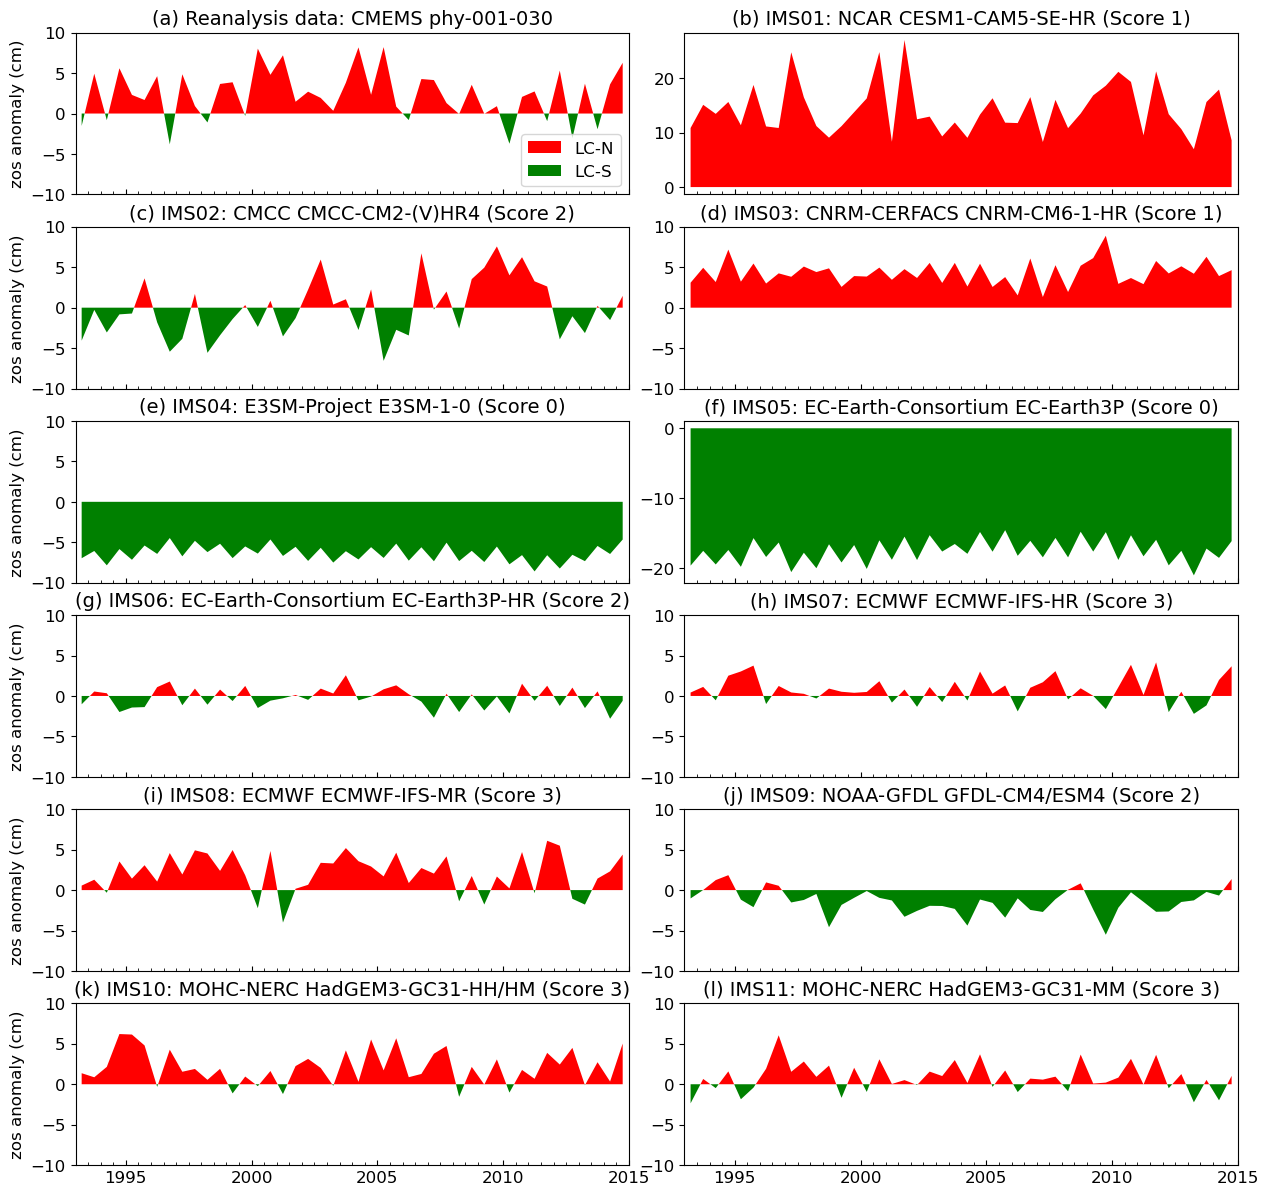

In [ ]:
resm=plot_zos(pd,plt,mdates,datetime,NM,dfzos,resm,MI,m,Display_Results=0,Show_Plot=1)

### b. Subset selection

![](https://drive.google.com/uc?export=view&id=1CSt84w-WcqZRNAZjaPvk9i2xTXWeAJqT)

#### b2. Subset selection
In this step we compose five multi-model ensembles `NME` using simple-average multi-model ensemble (SME). Each SME is composed of ensemble members with different scores.  For example, `3210` contains all ensemble members with scores from zero to three, i.e., all the 11 ensemble members listed in `df` table. Ensemble `321X`, `32XX`, and `3XXX` exclude ensemble members based on the three binary qualitative metrics (y<sub>1</sub> and y<sub>3</sub>), respectively (Section 2.4).

These are evolving metrics such that if an ensemble member scores zero in y<sub>1</sub>, it will score zero in y<sub>2</sub> and y<sub>3</sub>, and have an overall score of zero. If a model has a score y<sub>3</sub>, it will by default score one in  y<sub>2</sub> and  y<sub>1</sub>, and have an overall score of three. As such, `3XXX` contains the best ensemble members, which are the ones with a score of three. Ensemble `32XX` contains ensemble members with scores of three and two, and so on. On the other hand, ensemble `XXX0` contains only the least performing ensemble members with a score of zero. 

In [ ]:
#(1) Ensembles 
NME=['3210',   '321X',     '32XX',      '3XXX',       'XXX0']
ME=[[3,2,1,0], [3,2,1,-1], [3,2,-1,-1], [3,-1,-1,-1], [-1,-1,-1,0]]

#### b5. Evaluate prediction
b3. process input data as described in Section 2.4 using Code2 `zos_data_processing` <br>
b4. Define prediction metrics as described in Section 2.5 using Code3 `predictos`<br>
b5. Evaluate predictions as described in Section 2.6 using Code6 `zos_data_processing` that calls Code5 `Score_Members` <br>

In [ ]:
resEN,resMD,NME=zos_data_processing(NME,ME,Score_Members,df,resm,np,NM,pd,KB,LCO,LCM,zosO,ns,ne,ss,se,nm,zosMRaw,m,MI,Display_Results=0)

Step 1: Collect zos data (41, 264, 119) for north (41, 264, 13) and south (41, 264, 19) segments for all model runs for multi-model ensemble 3210
Step 1: Collect zos data (33, 264, 119) for north (33, 264, 13) and south (33, 264, 19) segments for all model runs for multi-model ensemble 321X
Step 1: Collect zos data (28, 264, 119) for north (28, 264, 13) and south (28, 264, 19) segments for all model runs for multi-model ensemble 32XX
Step 1: Collect zos data (20, 264, 119) for north (20, 264, 13) and south (20, 264, 19) segments for all model runs for multi-model ensemble 3XXX
Step 1: Collect zos data (8, 264, 119) for north (8, 264, 13) and south (8, 264, 19) segments for all model runs for multi-model ensemble XXX0
For each multi-model ensemble:
Step 2: Average zos data of all model runs for north segment (264, 13) and south segment (264, 19) 
Step 3: Average zos data of north segment(264,) and south segment (264,)
Step 4: Subtract zos data of north segment from south segment (264,)


The result table `resEN` shows predictive performance of the reanalysis data `obs` and five considered ensembles `32101`,`321X`,`32XX`,`3XXX`,and `XXX0`. The columns heading as the same as defined above in Section a3-a7.

In [ ]:
display(resEN)

,e_size,KB,LCN,LCS,LCN_NB,LCN_B,LCS_NB,LCS_B,Err_KB,Match_LCN,Match_LCS,Match_Tot,Err_LCN,Err_LCS,Err_Tot,RMSE
obs,,15,32,12,17,15,12,0,0,32,12,44,0,0,0,0
3210,41,15,3,41,2,1,27,14,0.933,2,11,13,0.938,0.083,0.705,5.13
321X,33,15,34,10,22,12,7,3,0.2,25,3,28,0.219,0.75,0.364,3.71
32XX,28,15,23,21,17,6,12,9,0.6,17,6,23,0.469,0.5,0.477,3.92
3XXX,20,15,35,9,22,13,7,2,0.133,28,5,33,0.125,0.583,0.25,3.68
XXX0,8,15,0,44,0,0,29,15,1,0,12,12,1,0,0.727,13.52


Use Code7 `Plot_zos_RA_ESMs` to plot the temporal match of large bloom/no bloom with Loop Current positions given the surface height above geoid (zos) anomaly of (a) reanalysis data, and (b-e) simulations of four multi-model ensembles. Positive and negative bars indicate Loop Current North (LC-N) and Loop Current South (LC-S), respectively.

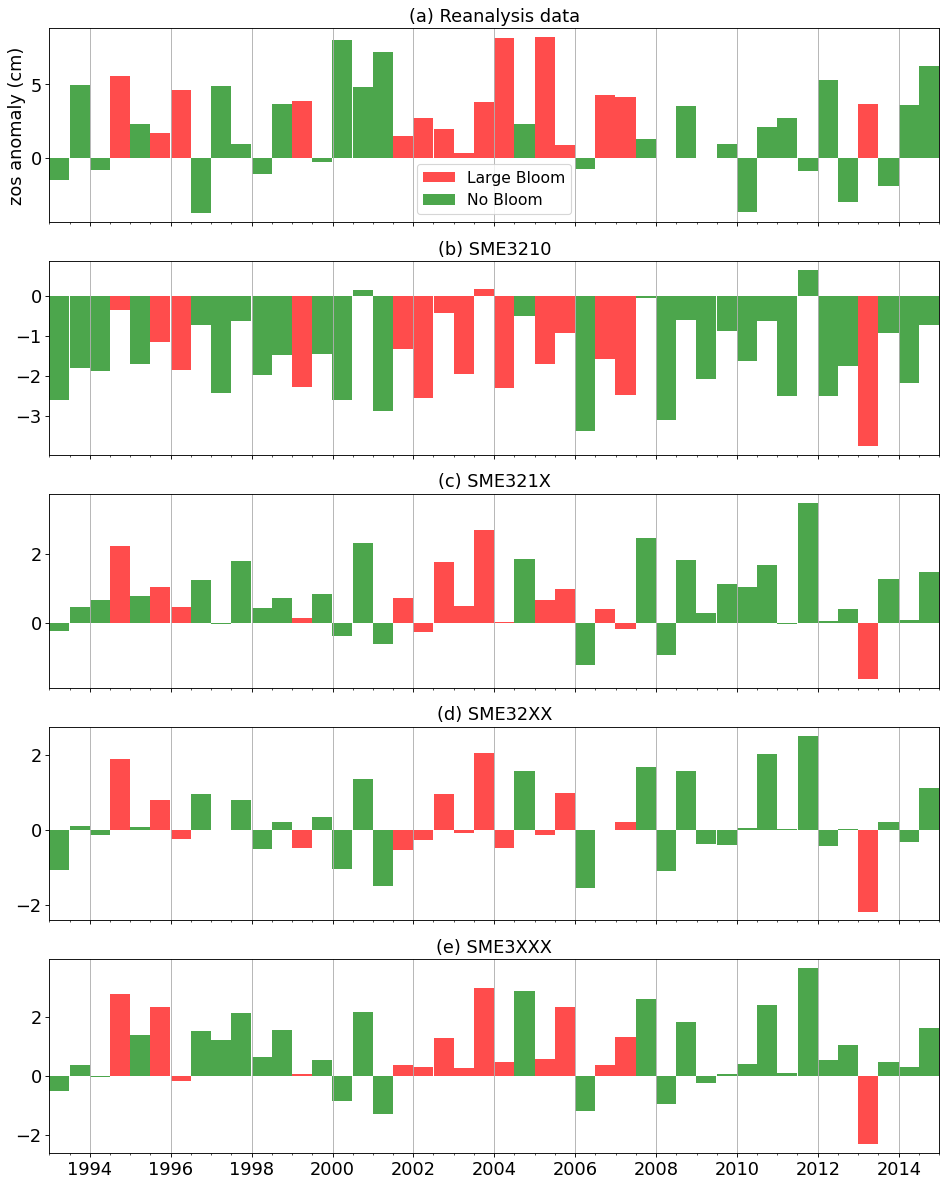

In [ ]:
Plot_zos_RA_ESMs(pd,resMD,NME,plt,mdates,datetime,MI,Show_Plot=1)

### Summary figure for prescreening based subset selection
Use Code8 `summary_results` to plot this summary figure

MAX_RMSE 5.13


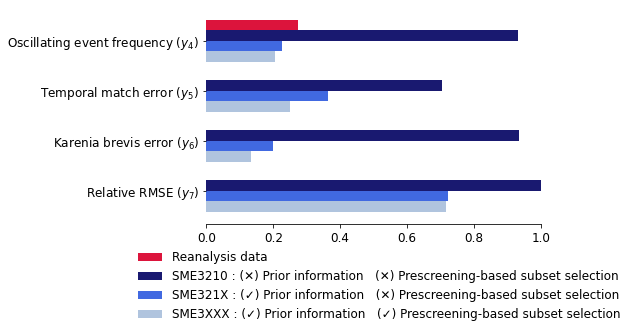

In [ ]:
SF=summary_results(NME,resEN,itertools,pd,plt,MI,Display_Results=0,Show_Plot=1)